# Modelado de Sequías con Machine Learning

Este notebook construye un modelo de clasificación para identificar eventos de sequía utilizando datos climáticos previamente limpiados y preparados.

El flujo de trabajo incluye:

- Carga del dataset limpio  
- Definición de la variable objetivo para representar sequías  
- Selección de variables predictoras  
- División del dataset en entrenamiento y prueba  
- Entrenamiento de un modelo de Machine Learning  
- Evaluación mediante métricas de clasificación  
- Visualización de la importancia de las variables  




In [5]:
# importamos las librerias necesarias
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [6]:
# Paso 1: Cargamos el dataset limpio
BASE_DIR = Path("..").resolve()     

# Carpeta donde se guardan los datasets limpios
data_path = BASE_DIR / "data_clean" / "master"

# Cargar el dataset "wide" (TEMP, HUMEDAD, LLUVIA, VIENTO)
df = pd.read_parquet(data_path / "master_dataset_final_wide.parquet")


In [7]:
# Paso 2: Crear variable binaria de sequía
# Se considera sequía cuando la lluvia es menor a 5 mm
df["drought_label"] = (df["LLUVIA"] < 5).astype(int)

df["drought_label"].value_counts()


drought_label
0    130
1     15
Name: count, dtype: int64

In [8]:
# Paso 3: Selección de features
X = df[["TEMP", "HUMEDAD", "LLUVIA", "VIENTO"]]
y = df["drought_label"]

X.head()


,TEMP,HUMEDAD,LLUVIA,VIENTO
0,NaN,93.1,NaN,1.0
1,25.7,NaN,NaN,NaN
2,29.7,NaN,NaN,NaN
3,NaN,80.7,NaN,0.4
4,NaN,NaN,15.6,NaN


In [9]:
# Paso 4: Crear división de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((116, 4), (29, 4))

In [10]:
# Paso 5: Entrenar Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Paso 6: Predicciones
y_pred = model.predict(X_test)

print("REPORTE DE CLASIFICACIÓN:\n")
print(classification_report(y_test, y_pred))

print("\nMATRIZ DE CONFUSIÓN:\n")
print(confusion_matrix(y_test, y_pred))


REPORTE DE CLASIFICACIÓN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         2

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


MATRIZ DE CONFUSIÓN:

[[27  0]
 [ 0  2]]


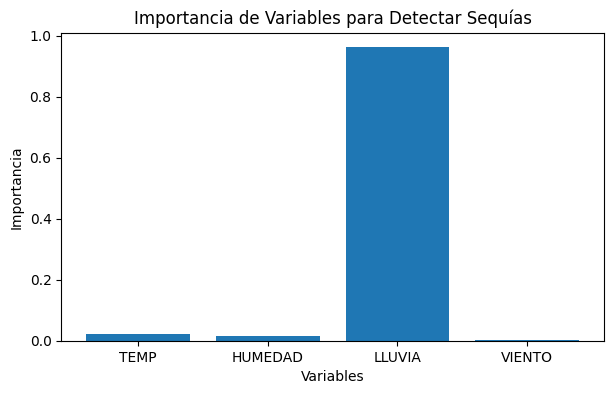

In [12]:
# Paso 7: Visualización
importances = model.feature_importances_

plt.figure(figsize=(7,4))
plt.bar(X.columns, importances)
plt.title("Importancia de Variables para Detectar Sequías")
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.show()
